In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [6]:
class LassoRegression() :
      
    def __init__( self, learning_rate, iterations, l1_penality ) :
          
        self.learning_rate = learning_rate        
        self.iterations = iterations        
        self.l1_penality = l1_penality
          
    # Function for model training            
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape
        #140. 1
        # weight initialization        
        self.W = np.zeros(self.n)
          
        self.b = 0        
        self.X = X        
        self.Y = Y
 
        # gradient descent learning                  
        for i in range(self.iterations) :            
            self.update_weights()
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights(self) :           
        Y_pred = self.predict(self.X).reshape(-1,1)

        # calculate gradients  
        dW = np.zeros(self.n)    
        for j in range(self.n):
            if self.W[j] > 0:
                dW[j] = ( - ( 2 *(self.X[:,j].T).dot( self.Y - Y_pred ) ) +               
                    ( self.l1_penality) ) / self.m 
            else:
                dW[j] = ( - ( 2 *(self.X[:,j].T).dot( self.Y - Y_pred ) ) -               
                    ( self.l1_penality) ) / self.m

        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
        # update weights
         
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db 

        return self
      
    # Hypothetical function  h( x ) 
    def predict(self, X) :    
        return X.dot(self.W) #+ self.b

In [7]:
# Importing dataset    
df = pd.read_csv( "data/column_2C_weka.csv" )

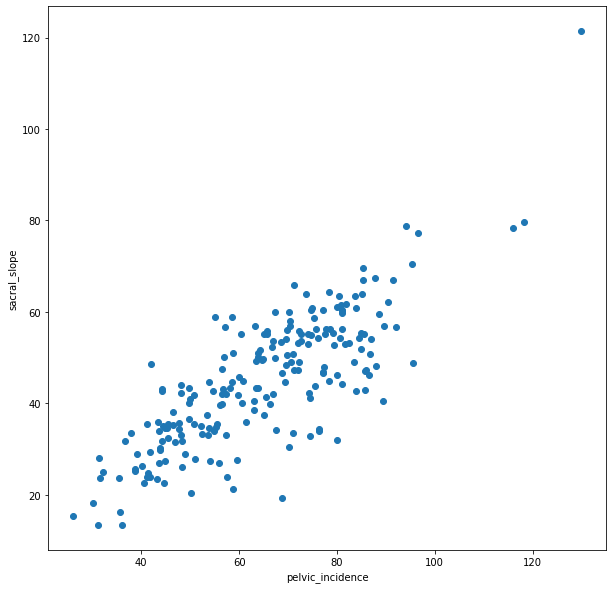

In [8]:
data1 = df[df['class'] =='Abnormal']
X = np.array(data1.loc[:,'pelvic_incidence']).reshape(-1,1)
y = np.array(data1.loc[:,'sacral_slope']).reshape(-1,1)
# Scatter
plt.figure(figsize=[10,10])
plt.scatter(x=X,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

In [14]:
#X = df.iloc[:, :-1].values
#Y = df.iloc[:, 1].values    

# Splitting dataset into train and test set
X_train, X_test, Y_train, Y_test = train_test_split( X, y, test_size = 1 / 3, random_state = 0 )

# Model training    
model = LassoRegression( iterations = 4500,                             
                    learning_rate = 0.00001, l1_penality = 1 )
model.fit( X_train, Y_train )


In [15]:
Y_pred = model.predict(X_test)

In [16]:
print( "Predicted values ", np.round( Y_pred[:3], 2 ) )     
print( "Real values      ", Y_test[:3] )    
print( "Trained W        ", model.W[0])    
print( "Trained b        ", model.b )

Predicted values  [34.41 54.24 27.2 ]
Real values       [[28.95099521]
 [46.63657704]
 [25.67681568]]
Trained W         0.7034260349249555
Trained b         0.01132718067577598


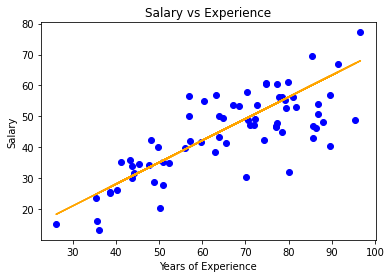

In [13]:
# Visualization on test set     
plt.scatter( X_test, Y_test, color = 'blue' )    
plt.plot( X_test, Y_pred, color = 'orange' )    
plt.title( 'Salary vs Experience' )    
plt.xlabel( 'Years of Experience' )    
plt.ylabel( 'Salary' )    
plt.show()